In [1]:
import re
import ast
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Read the JavaScript file
with open('/content/drive/MyDrive/COEN_396B/project/boundries.js', 'r') as file:
    content = file.read()

FileNotFoundError: ignored

In [3]:
# Read the JavaScript file
with open('boundries.js', 'r') as file:
    content = file.read()

In [4]:
content

'var countyData = {\n  "type": "FeatureCollection",\n  "features": [\n    {\n      "type": "Feature",\n      "properties": {\n        "1995": {\n          "population": 1333031,\n          "tons_disposed": 1583135.05\n        },\n        "1996": {\n          "population": 1340509,\n          "tons_disposed": 1510874.25\n        },\n        "1997": {\n          "population": 1361330,\n          "tons_disposed": 1593570.29\n        },\n        "1998": {\n          "population": 1389000,\n          "tons_disposed": 1671466.25\n        },\n        "1999": {\n          "population": 1412315,\n          "tons_disposed": 1733182.35\n        },\n        "2000": {\n          "population": 1437136,\n          "tons_disposed": 1676429.25\n        },\n        "2001": {\n          "population": 1457185,\n          "tons_disposed": 1629208.38\n        },\n        "2002": {\n          "population": 1467063,\n          "tons_disposed": 1596803\n        },\n        "2003": {\n          "population": 14

In [5]:
# Remove the leading "var countyData =" part from the string
countyData = content.replace('var countyData = ', '')

# Parse the string as JSON
data = json.loads(countyData)

# Extract the required data
county_list = []
year_list = []
population_list = []
tons_disposed_list = []

for feature in data['features']:
    county = feature['properties']['name']
    for year, year_data in feature['properties'].items():
        if year.isnumeric():
            population = year_data['population']
            tons_disposed = year_data['tons_disposed']
            county_list.append(county)
            year_list.append(int(year))
            population_list.append(population)
            tons_disposed_list.append(tons_disposed)

# Create a dictionary from the extracted data
data = {
    'County': county_list,
    'Year': year_list,
    'Population': population_list,
    'Tons_Disposed': tons_disposed_list
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

               County  Year  Population  Tons_Disposed
0             Alameda  1995     1333031     1583135.05
1             Alameda  1996     1340509     1510874.25
2             Alameda  1997     1361330     1593570.29
3             Alameda  1998     1389000     1671466.25
4             Alameda  1999     1412315     1733182.35
...               ...   ...         ...            ...
1387  San Luis Obispo  2014      275625      243378.01
1388  San Luis Obispo  2015      276669      255724.73
1389  San Luis Obispo  2016      278141      299713.14
1390  San Luis Obispo  2017      279210      310405.29
1391  San Luis Obispo  2018      280101      290200.69

[1392 rows x 4 columns]


In [6]:
# Legislation sentiment scores
# legislation_sentiment = {
#     2018: 0.9081,
#     2017: 0.5423,
#     2016: 0.9217,
#     2015: -0.7964,
#     2014: -0.9657,
#     2013: 0.9337,
#     2012: -0.9694,
#     2011: -0.9565,
#     2010: 0.969,
#     2009: -0.9451,
#     2008: 0.9022,
#     2007: 0.6705,
#     2006: 0.9955,
#     2005: -0.9217,
#     2004: -0.9964,
#     2003: 0.9705,
#     2002: -0.9953,
#     2001: 0.9846,
#     2000: 0.9906,
#     1999: 0.9944,
#     1998: -0.9825,
#     1997: 0.4215,
#     1996: -0.9856,
#     1995: -0.9994
# }

legislation_sentiment ={2018: 0.058695652173913045,
 2017: 0.0035714285714285657,
 2016: 0.015308734058734065,
 2015: -0.07142857142857142,
 2014: -0.018701298701298698,
 2013: 0.0071645021645021685,
 2012: -0.0414451827242525,
 2011: -0.04465894465894467,
 2010: 0.002861952861952862,
 2009: -0.09948347107438016,
 2008: 0.0850517129928894,
 2007: 0.11777643260694105,
 2006: 0.12068452380952387,
 2005: 0.006569664902998241,
 2004: 0.013095238095238083,
 2003: 0.10880875986758334,
 2002: -0.01001940133037694,
 2001: 0.028593595159860208,
 2000: 0.026839826839826816,
 1999: 0.06948025551684088,
 1998: -0.07257142857142856,
 1997: 0.09459459459459457,
 1996: 0.023652422845971206,
 1995: 0.0541418807270543}

# Create a new column for sentiment scores in the dataframe
df['Sentiment_Score'] = df['Year'].map(legislation_sentiment)

# Print the updated dataframe
print(df)

               County  Year  Population  Tons_Disposed  Sentiment_Score
0             Alameda  1995     1333031     1583135.05         0.054142
1             Alameda  1996     1340509     1510874.25         0.023652
2             Alameda  1997     1361330     1593570.29         0.094595
3             Alameda  1998     1389000     1671466.25        -0.072571
4             Alameda  1999     1412315     1733182.35         0.069480
...               ...   ...         ...            ...              ...
1387  San Luis Obispo  2014      275625      243378.01        -0.018701
1388  San Luis Obispo  2015      276669      255724.73        -0.071429
1389  San Luis Obispo  2016      278141      299713.14         0.015309
1390  San Luis Obispo  2017      279210      310405.29         0.003571
1391  San Luis Obispo  2018      280101      290200.69         0.058696

[1392 rows x 5 columns]


In [7]:
# Extract the 'Year' and 'Sentiment_Score' columns
sentiment_df = pd.DataFrame.from_dict(legislation_sentiment, orient='index', columns=['Sentiment_Score'])
sentiment_df.index.name = 'Year'

sentiment_df

,Sentiment_Score
Year,
2018,0.058696
2017,0.003571
2016,0.015309
2015,-0.071429
2014,-0.018701
2013,0.007165
2012,-0.041445
2011,-0.044659
2010,0.002862


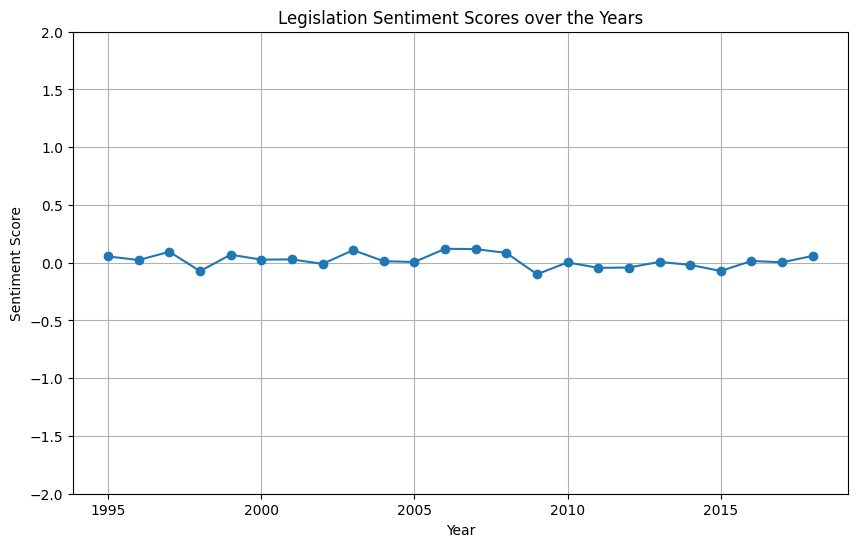

In [8]:
# Plot line chart for sentiment scores
plt.figure(figsize=(10, 6))
plt.plot(sentiment_df.index, sentiment_df['Sentiment_Score'], marker='o')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Legislation Sentiment Scores over the Years')
plt.grid(True)
plt.ylim(-2, 2)
plt.show()

In [9]:
waste_per_capita_df = df.groupby('Year').apply(lambda x: (x['Tons_Disposed'] / x['Population']).mean()).reset_index(name='Average_Waste_Per_Capita')
waste_per_capita_df

,Year,Average_Waste_Per_Capita
0,1995,0.819264
1,1996,0.816117
2,1997,0.863644
3,1998,0.890916
4,1999,0.867828
5,2000,0.881186
6,2001,0.899346
7,2002,0.902766
8,2003,0.983344
9,2004,0.984560


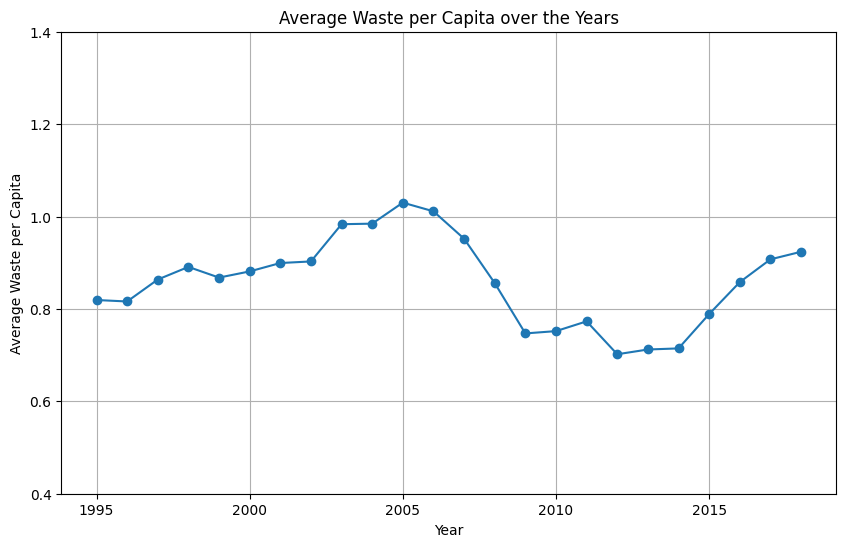

In [10]:
# Plot line chart for average waste per capita
plt.figure(figsize=(10, 6))
plt.plot(waste_per_capita_df['Year'], waste_per_capita_df['Average_Waste_Per_Capita'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Waste per Capita')
plt.title('Average Waste per Capita over the Years')
plt.grid(True)
plt.ylim(0.4, 1.4)
plt.show()

In [11]:
# Merge the sentiment score and waste per capita datasets
combined_df = pd.merge(sentiment_df, waste_per_capita_df, on='Year')
print(combined_df)
# Normalize the sentiment score and waste per capita values using min-max normalization
combined_df['Normalized_Sentiment_Score'] = (combined_df['Sentiment_Score'] - combined_df['Sentiment_Score'].min()) / (combined_df['Sentiment_Score'].max() - combined_df['Sentiment_Score'].min())
combined_df['Normalized_Waste_Per_Capita'] = (combined_df['Average_Waste_Per_Capita'] - combined_df['Average_Waste_Per_Capita'].min()) / (combined_df['Average_Waste_Per_Capita'].max() - combined_df['Average_Waste_Per_Capita'].min())

    Year  Sentiment_Score  Average_Waste_Per_Capita
0   2018         0.058696                  0.923701
1   2017         0.003571                  0.907319
2   2016         0.015309                  0.857989
3   2015        -0.071429                  0.788888
4   2014        -0.018701                  0.714546
5   2013         0.007165                  0.712172
6   2012        -0.041445                  0.701883
7   2011        -0.044659                  0.773099
8   2010         0.002862                  0.751967
9   2009        -0.099483                  0.746973
10  2008         0.085052                  0.855896
11  2007         0.117776                  0.951962
12  2006         0.120685                  1.011261
13  2005         0.006570                  1.030070
14  2004         0.013095                  0.984560
15  2003         0.108809                  0.983344
16  2002        -0.010019                  0.902766
17  2001         0.028594                  0.899346
18  2000    

In [15]:
# combined_df
df_reversed = combined_df.iloc[::-1]
df_reversed.reset_index(drop=True, inplace=True)
df_reversed

,Year,Sentiment_Score,Average_Waste_Per_Capita,Normalized_Sentiment_Score,Normalized_Waste_Per_Capita
0,1995,0.054142,0.819264,0.697764,0.357664
1,1996,0.023652,0.816117,0.559282,0.348077
2,1997,0.094595,0.863644,0.881500,0.492892
3,1998,-0.072571,0.890916,0.122234,0.575990
4,1999,0.069480,0.867828,0.767431,0.505641
5,2000,0.026840,0.881186,0.573759,0.546342
6,2001,0.028594,0.899346,0.581724,0.601678
7,2002,-0.010019,0.902766,0.406345,0.612099
8,2003,0.108809,0.983344,0.946060,0.857622
9,2004,0.013095,0.984560,0.511331,0.861327


In [16]:
df_reversed['Normalized_Sentiment_Score']

0     0.697764
1     0.559282
2     0.881500
3     0.122234
4     0.767431
5     0.573759
6     0.581724
7     0.406345
8     0.946060
9     0.511331
10    0.481692
11    1.000000
12    0.986791
13    0.838156
14    0.000000
15    0.464852
16    0.249012
17    0.263609
18    0.484394
19    0.366912
20    0.127425
21    0.521385
22    0.468074
23    0.718447
Name: Normalized_Sentiment_Score, dtype: float64

In [ ]:
df_reversed.to_csv('/content/drive/MyDrive/COEN_396B/project/normalized_sentiment_score_waste_per_capita.csv', index=False)

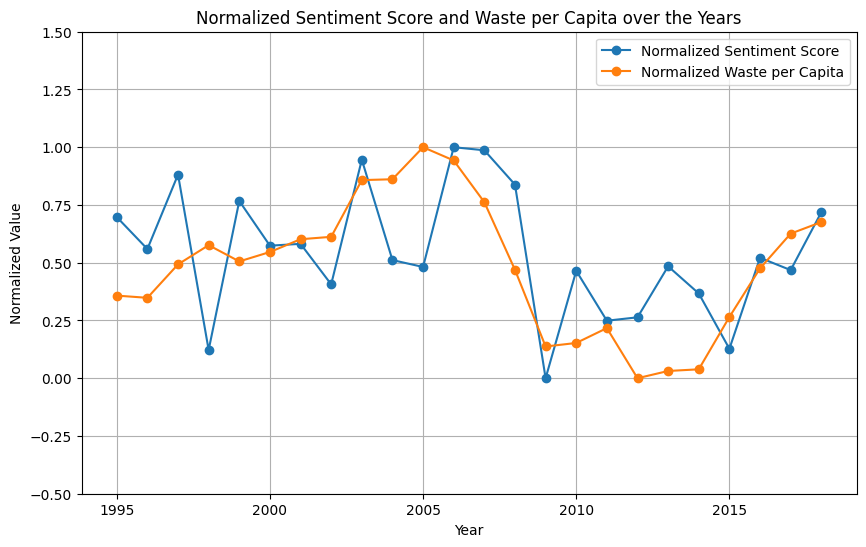

In [ ]:
# Plot the line chart for the normalized values
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['Normalized_Sentiment_Score'], marker='o', label='Normalized Sentiment Score')
plt.plot(combined_df['Year'], combined_df['Normalized_Waste_Per_Capita'], marker='o', label='Normalized Waste per Capita')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized Sentiment Score and Waste per Capita over the Years')
plt.legend()
plt.grid(True)
plt.ylim(-0.5,1.5)
plt.show()

In [ ]:
# Group the original dataframe by 'County' and 'Year' and calculate the average waste per capita
waste_per_capita_counties_df = df.groupby(['County', 'Year']).apply(lambda x: x['Tons_Disposed'].sum() / x['Population'].sum()).reset_index(name='Waste_Per_Capita')
waste_per_capita_counties_df

,County,Year,Waste_Per_Capita
0,Alameda,1995,1.187621
1,Alameda,1996,1.127090
2,Alameda,1997,1.170598
3,Alameda,1998,1.203359
4,Alameda,1999,1.227192
...,...,...,...
1387,Yuba,2014,1.870919
1388,Yuba,2015,1.747939
1389,Yuba,2016,1.826077
1390,Yuba,2017,2.295482


In [14]:
# Merge the sentiment score and waste per capita datasets
combined_df = pd.merge(sentiment_df, waste_per_capita_counties_df, on='Year')

# Normalize the sentiment score and waste per capita values using min-max normalization
combined_df['Normalized_Sentiment_Score'] = (combined_df['Sentiment_Score'] - combined_df['Sentiment_Score'].min()) / (combined_df['Sentiment_Score'].max() - combined_df['Sentiment_Score'].min())
combined_df['Normalized_Waste_Per_Capita'] = (combined_df['Waste_Per_Capita'] - combined_df['Waste_Per_Capita'].min()) / (combined_df['Waste_Per_Capita'].max() - combined_df['Waste_Per_Capita'].min())
combined_df

NameError: ignored

In [13]:
print(combined['Normalized_Sentiment_Score'])

NameError: ignored

In [ ]:
# Calculate the correlation between normalized sentiment score and normalized waste per capita for each county
correlation = combined_df.groupby('County')['Normalized_Sentiment_Score', 'Normalized_Waste_Per_Capita'].corr().iloc[0::2, -1]
correlation

<ipython-input-15-f04ffaf2f867>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation = combined_df.groupby('County')['Normalized_Sentiment_Score', 'Normalized_Waste_Per_Capita'].corr().iloc[0::2, -1]


County                                     
Alameda          Normalized_Sentiment_Score    0.451895
Alpine           Normalized_Sentiment_Score    0.448306
Amador           Normalized_Sentiment_Score    0.236463
Butte            Normalized_Sentiment_Score    0.469588
Calaveras        Normalized_Sentiment_Score    0.054411
Colusa           Normalized_Sentiment_Score   -0.022192
Contra Costa     Normalized_Sentiment_Score    0.495271
Del Norte        Normalized_Sentiment_Score    0.179840
El Dorado        Normalized_Sentiment_Score   -0.060511
Fresno           Normalized_Sentiment_Score    0.671563
Glenn            Normalized_Sentiment_Score    0.394100
Humboldt         Normalized_Sentiment_Score    0.049030
Imperial         Normalized_Sentiment_Score    0.440935
Inyo             Normalized_Sentiment_Score   -0.235176
Kern             Normalized_Sentiment_Score    0.552785
Kings            Normalized_Sentiment_Score    0.440838
Lake             Normalized_Sentiment_Score   -0.160185
Lass

In [ ]:
# Select the 10 counties with the highest correlation values
top_counties = correlation.abs().nlargest(5).index
top_counties = [row[0] for row in top_counties]
top_counties

['Fresno', 'Kern', 'Placer', 'Tulare', 'San Bernardino']

In [ ]:
selected_counties_df = combined_df[combined_df['County'].isin(top_counties)]
selected_counties_df

,Year,Sentiment_Score,County,Waste_Per_Capita,Normalized_Sentiment_Score,Normalized_Waste_Per_Capita
9,2018,0.058696,Fresno,0.873574,0.718447,0.249684
14,2018,0.058696,Kern,1.143781,0.718447,0.326914
30,2018,0.058696,Placer,0.780221,0.718447,0.223002
35,2018,0.058696,San Bernardino,0.891474,0.718447,0.254800
53,2018,0.058696,Tulare,0.890871,0.718447,0.254628
...,...,...,...,...,...,...
1343,1995,0.054142,Fresno,0.898237,0.697764,0.256733
1348,1995,0.054142,Kern,1.065420,0.697764,0.304517
1364,1995,0.054142,Placer,0.924411,0.697764,0.264214
1369,1995,0.054142,San Bernardino,1.031143,0.697764,0.294720


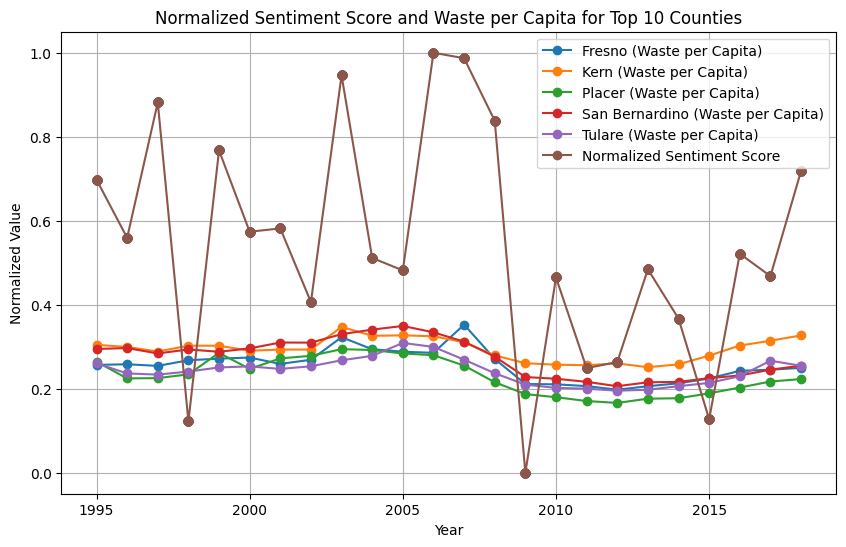

In [ ]:
plt.figure(figsize=(10, 6))
for county in selected_counties_df['County'].unique():
    county_data = selected_counties_df[selected_counties_df['County'] == county]
    plt.plot(county_data['Year'], county_data['Normalized_Waste_Per_Capita'], marker='o', label=county + ' (Waste per Capita)')

plt.plot(combined_df['Year'], combined_df['Normalized_Sentiment_Score'], marker='o', label='Normalized Sentiment Score')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized Sentiment Score and Waste per Capita for Top 10 Counties')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the population ranges
population_ranges = [(0, 200000), (200000, 400000), (600000, 800000), (800000, 1000000), (1000000, float('inf'))]

# Assign the population range to each county
df['Population_Range'] = pd.cut(df['Population'], bins=[r[0] for r in population_ranges] + [np.inf], labels=population_ranges)

# Group the dataset by population range and year, calculate the average waste per capita
grouped = df.groupby(['Population_Range', 'Year']).apply(lambda x: x['Tons_Disposed'].sum() / x['Population'].sum()).reset_index(name='Avg_Waste_Per_Capita')

# Create a new dataset with the average waste per capita and county population range
result = df.groupby('Population_Range')['County'].unique().reset_index(name='Counties')

# Display the final result
print(grouped)
print(result)

    Population_Range  Year  Avg_Waste_Per_Capita
0        (0, 200000)  1995              0.801778
1        (0, 200000)  1996              0.765389
2        (0, 200000)  1997              0.747125
3        (0, 200000)  1998              0.726641
4        (0, 200000)  1999              0.698279
..               ...   ...                   ...
115   (1000000, inf)  2014              0.822937
116   (1000000, inf)  2015              0.861998
117   (1000000, inf)  2016              0.895575
118   (1000000, inf)  2017              0.946691
119   (1000000, inf)  2018              0.960865

[120 rows x 3 columns]
    Population_Range                                           Counties
0        (0, 200000)  [Alpine, Amador, Butte, Calaveras, Colusa, Del...
1   (200000, 400000)  [Butte, Solano, Sonoma, Marin, Merced, Tulare,...
2   (600000, 800000)  [Fresno, San Francisco, Kern, San Mateo, Ventu...
3  (800000, 1000000)  [Contra Costa, Fresno, San Francisco, Kern, Ve...
4     (1000000, inf)  [Alame

In [ ]:
# Normalize the average waste per capita within each population range
grouped['Normalized_Avg_Waste_Per_Capita'] = grouped.groupby('Population_Range')['Avg_Waste_Per_Capita'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

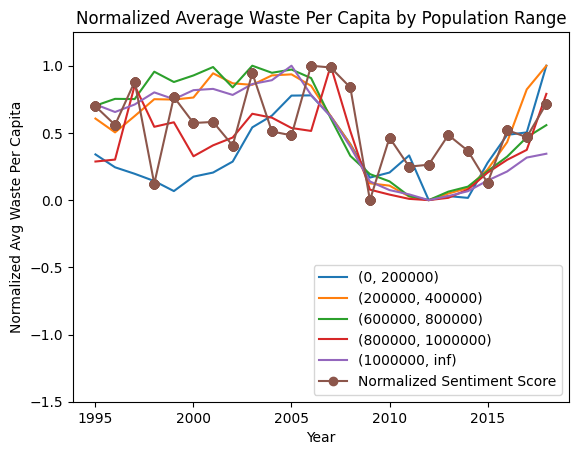

In [ ]:
for population_range, group in grouped.groupby('Population_Range'):
    plt.plot(group['Year'], group['Normalized_Avg_Waste_Per_Capita'], label=str(population_range))
plt.plot(combined_df['Year'], combined_df['Normalized_Sentiment_Score'], marker='o', label='Normalized Sentiment Score')
plt.title('Normalized Average Waste Per Capita by Population Range')
plt.xlabel('Year')
plt.ylabel('Normalized Avg Waste Per Capita')
plt.legend(loc='lower right')
plt.ylim(-1.5,1.25)
plt.show()